# token eda

content 내 토큰 길이 계산

- 요약 모델 선정
- 요금 계산

In [ ]:
# # tokenizer

# %pip install --upgrade tiktoken
# %pip install --upgrade openai

In [1]:
import tiktoken

def num_tokens_from_string(string: str, model_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.encoding_for_model(model_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [2]:
total_rows = 0

In [3]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

def count_tokens(json_path: str, model_name: str):
    contents = []
    content_token_length = []

    global total_rows

    # 파일을 열고 JSON 데이터를 파싱하여 불러오기
    with open(json_path, "r", encoding="utf-8") as file:
        data = json.load(file)
    
    total_rows += len(data)
    for row in data:
        if type(row['content']) == str:
            contents.append(row['content'])
            content_token_length.append(num_tokens_from_string(row['content'], model_name))

        elif type(row['content']) == list:
            contents += row['content']
            content_token_length.append(sum([num_tokens_from_string(x, model_name) for x in row['content']]))

        else:
            raise ValueError("not str or list")

    sns.displot(content_token_length, kind='kde')
    plt.xlim(0, )
    plt.title(json_path.split("/")[-1])

    print("- Total row count : ", len(content_token_length))
    print("- max tokens : ", max(content_token_length))
    print("- min tokens : ", min(content_token_length))
    print("- avg tokens : ", sum(content_token_length)/len(content_token_length))
    return contents, content_token_length

https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb

In [4]:
total_tokens = 0

## GPT-3.5-Turbo

- Total row count :  597
- max tokens :  5258
- min tokens :  13
- avg tokens :  573.3936348408711


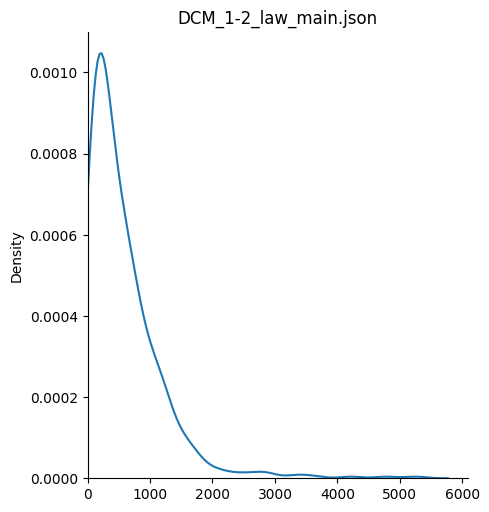

In [5]:
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_law_main.json", "gpt-3.5-turbo")
total_tokens += sum(content_token_length)

- Total row count :  990
- max tokens :  2217
- min tokens :  3
- avg tokens :  125.0989898989899


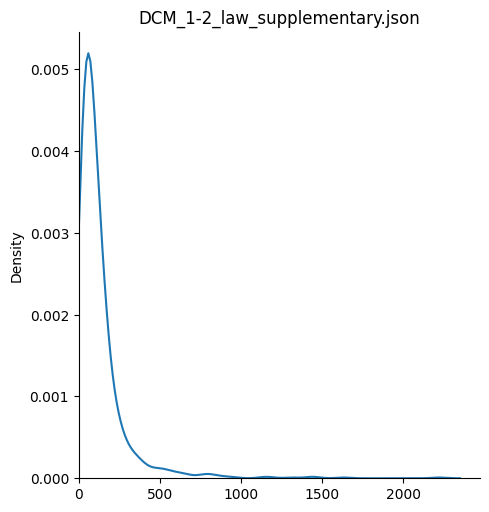

In [6]:
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_law_supplementary.json", "gpt-3.5-turbo")
total_tokens += sum(content_token_length)

- Total row count :  5
- max tokens :  198
- min tokens :  28
- avg tokens :  98.8


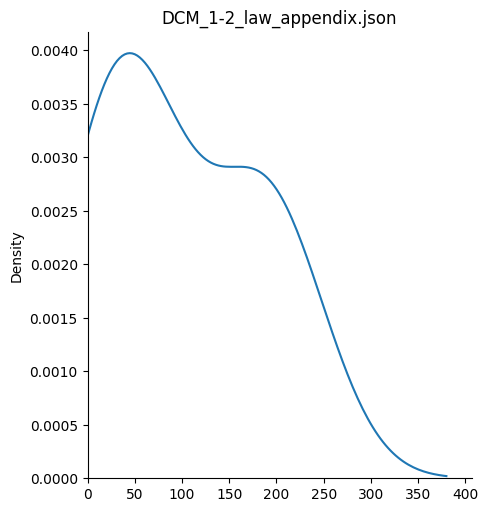

In [7]:
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_law_appendix.json", "gpt-3.5-turbo")
total_tokens += sum(content_token_length)

- Total row count :  544
- max tokens :  11162
- min tokens :  13
- avg tokens :  774.1194852941177


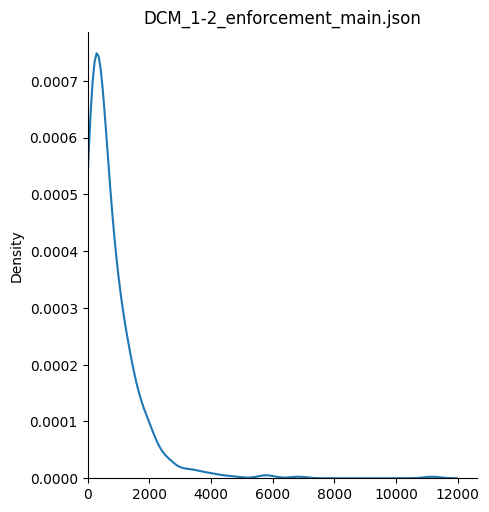

In [8]:
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_enforcement_main.json", "gpt-3.5-turbo")
total_tokens += sum(content_token_length)

- Total row count :  946
- max tokens :  2269
- min tokens :  3
- avg tokens :  119.32135306553911


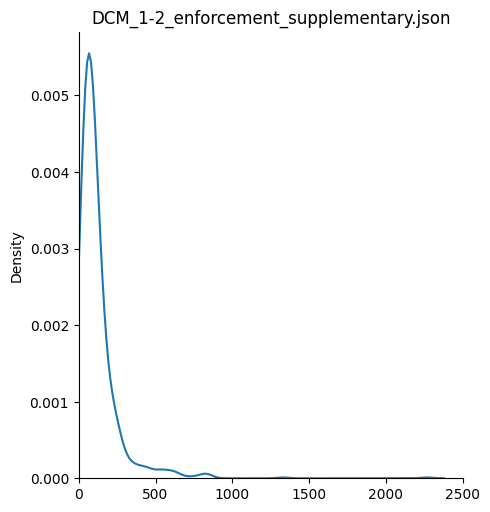

In [9]:
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_enforcement_supplementary.json", "gpt-3.5-turbo")
total_tokens += sum(content_token_length)

- Total row count :  2
- max tokens :  217
- min tokens :  23
- avg tokens :  120.0


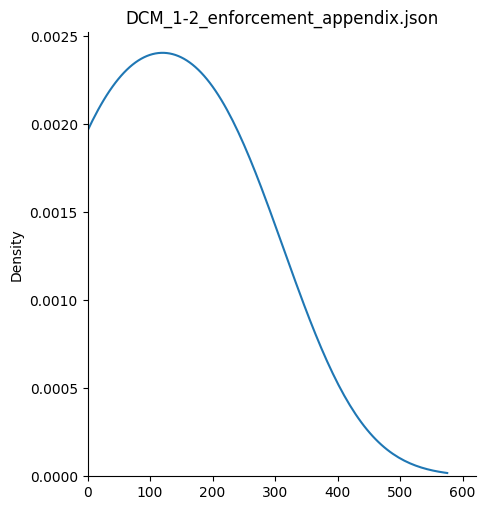

In [10]:
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_enforcement_appendix.json", "gpt-3.5-turbo")
total_tokens += sum(content_token_length)

- Total row count :  61
- max tokens :  2052
- min tokens :  13
- avg tokens :  346.672131147541


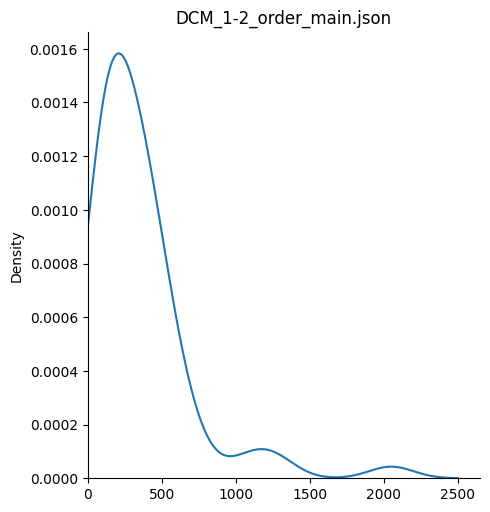

In [11]:
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_order_main.json", "gpt-3.5-turbo")
total_tokens += sum(content_token_length)

- Total row count :  19
- max tokens :  403
- min tokens :  11
- avg tokens :  108.21052631578948


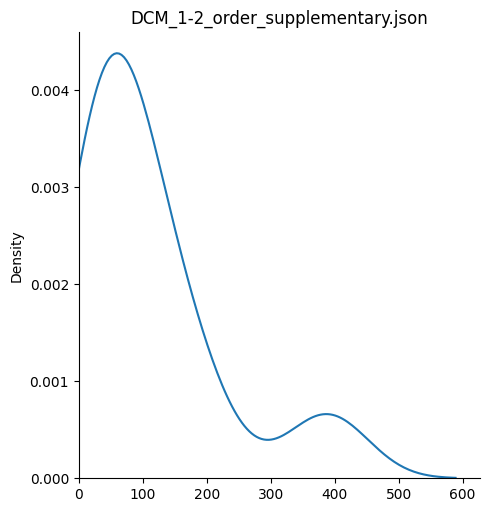

In [12]:
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_order_supplementary.json", "gpt-3.5-turbo")
total_tokens += sum(content_token_length)

- Total row count :  110
- max tokens :  3933
- min tokens :  16
- avg tokens :  703.5818181818182


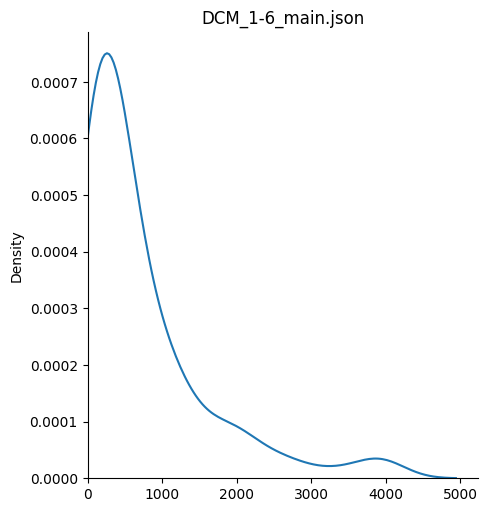

In [13]:
contents, content_token_length = count_tokens("../results/1-6/DCM_1-6_main.json", "gpt-3.5-turbo")
total_tokens += sum(content_token_length)

- Total row count :  38
- max tokens :  159
- min tokens :  19
- avg tokens :  60.39473684210526


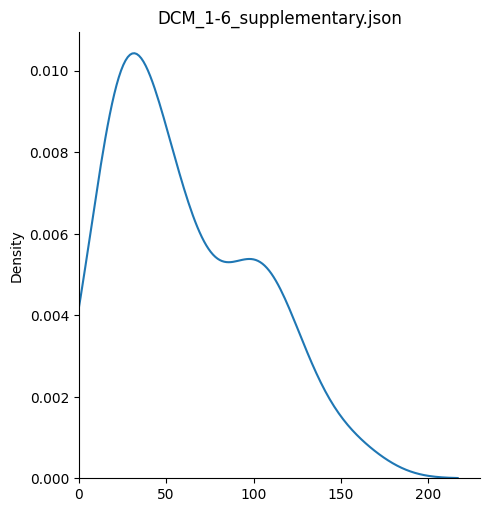

In [14]:
contents, content_token_length = count_tokens("../results/1-6/DCM_1-6_supplementary.json", "gpt-3.5-turbo")
total_tokens += sum(content_token_length)

- Total row count :  1
- max tokens :  19
- min tokens :  19
- avg tokens :  19.0


/tmp/ipykernel_181341/672432927.py:28: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(content_token_length, kind='kde')


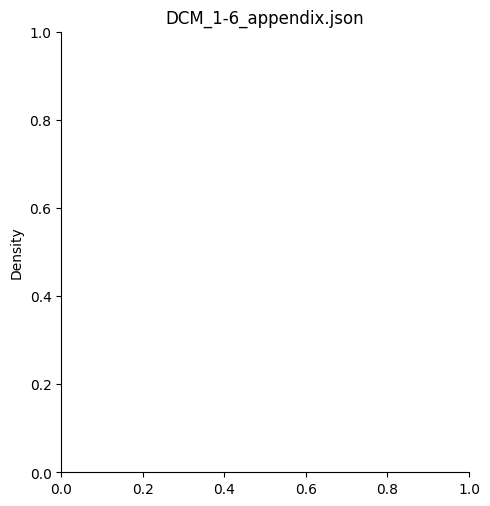

In [15]:
contents, content_token_length = count_tokens("../results/1-6/DCM_1-6_appendix.json", "gpt-3.5-turbo")
total_tokens += sum(content_token_length)

In [16]:
total_tokens

1103808

In [17]:
total_rows

3313

In [18]:
1103808 + 3313 * 116

1488116

## GPT-4-turbo

- Total row count :  597
- max tokens :  5258
- min tokens :  13
- avg tokens :  573.3936348408711
- Total row count :  990
- max tokens :  2217
- min tokens :  3
- avg tokens :  125.0989898989899
- Total row count :  5
- max tokens :  198
- min tokens :  28
- avg tokens :  98.8
- Total row count :  544
- max tokens :  11162
- min tokens :  13
- avg tokens :  774.1194852941177
- Total row count :  946
- max tokens :  2269
- min tokens :  3
- avg tokens :  119.32135306553911
- Total row count :  2
- max tokens :  217
- min tokens :  23
- avg tokens :  120.0
- Total row count :  61
- max tokens :  2052
- min tokens :  13
- avg tokens :  346.672131147541
- Total row count :  19
- max tokens :  403
- min tokens :  11
- avg tokens :  108.21052631578948
- Total row count :  110
- max tokens :  3933
- min tokens :  16
- avg tokens :  703.5818181818182
- Total row count :  38
- max tokens :  159
- min tokens :  19
- avg tokens :  60.39473684210526
- Total row count :  1
- max tokens :  19
- mi

/tmp/ipykernel_181341/672432927.py:28: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(content_token_length, kind='kde')


3311424

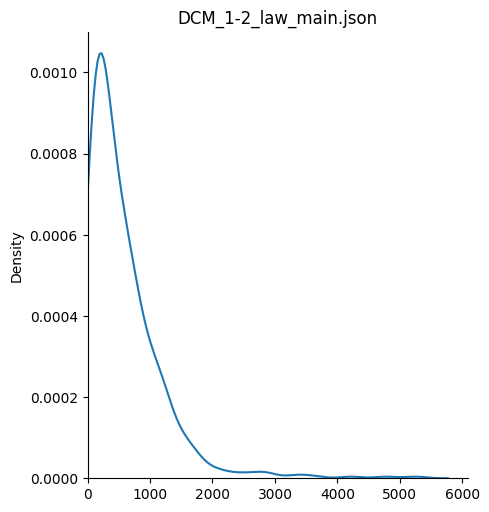

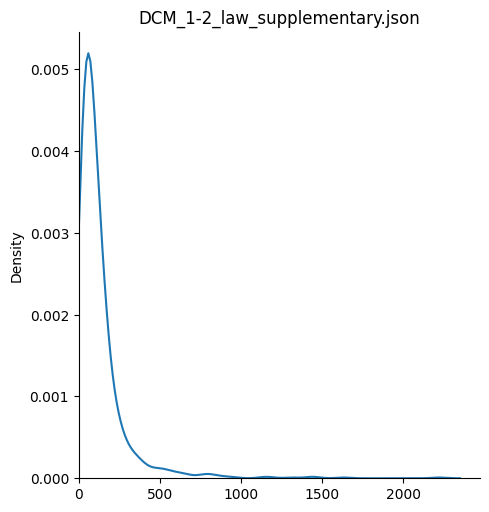

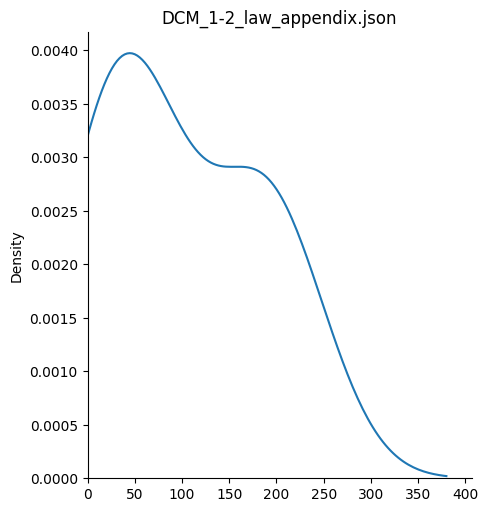

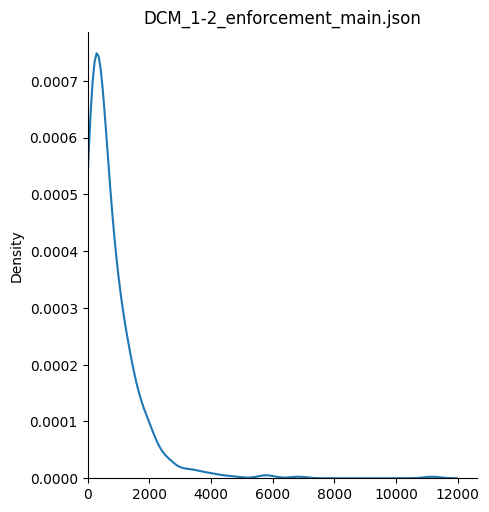

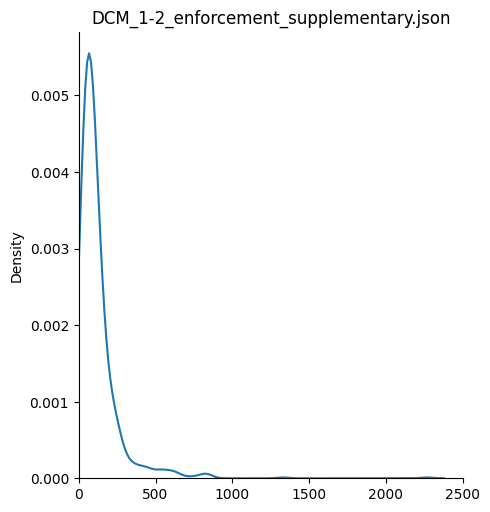

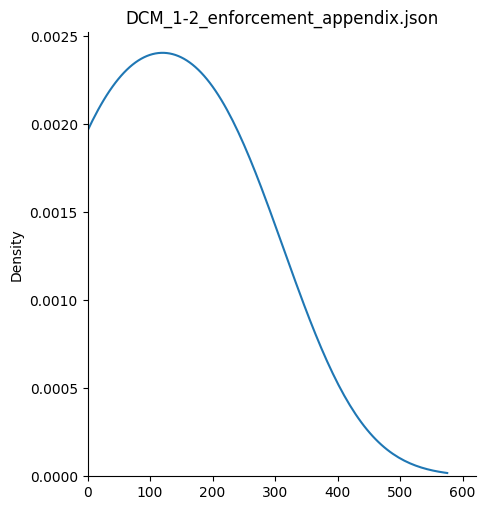

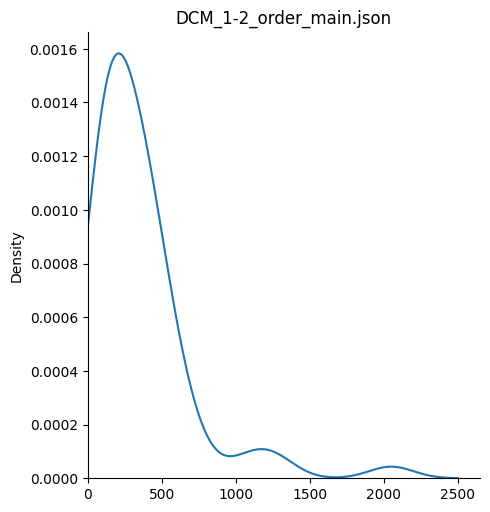

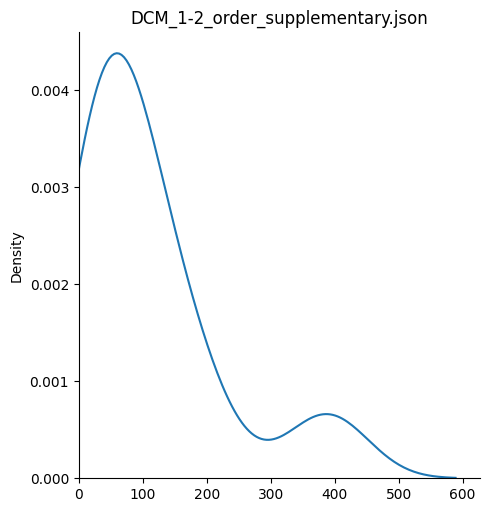

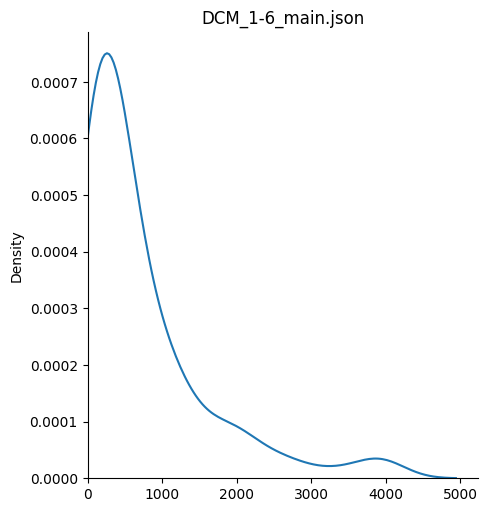

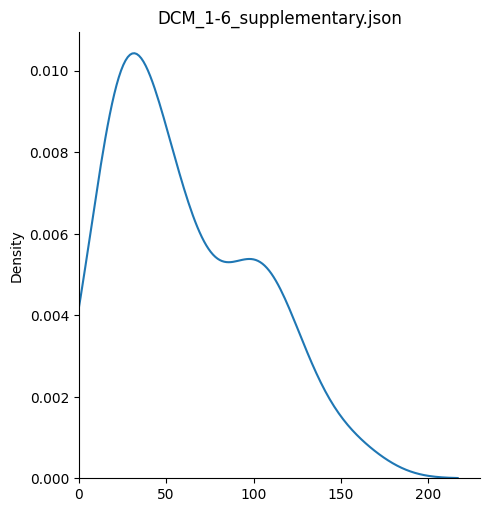

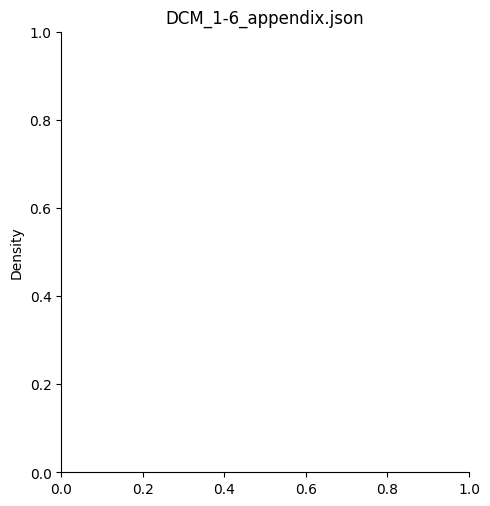

In [20]:
## GPT-4-turbo
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_law_main.json", "gpt-4-turbo")
total_tokens += sum(content_token_length)
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_law_supplementary.json", "gpt-4-turbo")
total_tokens += sum(content_token_length)
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_law_appendix.json", "gpt-4-turbo")
total_tokens += sum(content_token_length)
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_enforcement_main.json", "gpt-4-turbo")
total_tokens += sum(content_token_length)
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_enforcement_supplementary.json", "gpt-4-turbo")
total_tokens += sum(content_token_length)
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_enforcement_appendix.json", "gpt-4-turbo")
total_tokens += sum(content_token_length)
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_order_main.json", "gpt-4-turbo")
total_tokens += sum(content_token_length)
contents, content_token_length = count_tokens("../results/1-2/DCM_1-2_order_supplementary.json", "gpt-4-turbo")
total_tokens += sum(content_token_length)
contents, content_token_length = count_tokens("../results/1-6/DCM_1-6_main.json", "gpt-4-turbo")
total_tokens += sum(content_token_length)
contents, content_token_length = count_tokens("../results/1-6/DCM_1-6_supplementary.json", "gpt-4-turbo")
total_tokens += sum(content_token_length)
contents, content_token_length = count_tokens("../results/1-6/DCM_1-6_appendix.json", "gpt-4-turbo")
total_tokens += sum(content_token_length)
total_tokens

In [21]:
1024*3313

3392512

In [22]:
(1488116 / 1000000) * 0.5 + (3392512 / 1000000) * 1.5

5.832826

In [23]:
(1488116 / 1000000) * 10.0 + (3392512 / 1000000) * 30.0

116.65652